In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.
#
#
# ПОДБОР ПАРАМЕТРОВ В ОТДЕЛЬНЫХ ФАЙЛАХ, важно там сохранять ramdom_seed для повторимости результата
# данные файлы обязательны к размещению в репозитории
##
#

### Подключение библиотек

In [2]:
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
#from termcolor import colored as cl
from os import path
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.neighbors import (KNeighborsClassifier, NeighborhoodComponentsAnalysis)
from sklearn import metrics
from sklearn.metrics import auc, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, PowerTransformer, QuantileTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression as SklearnLinearRegression, LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import explained_variance_score as evs
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

### Обучение и выполнение лучшей модели

In [4]:
# В области находится одна, единственная, итоговая модель машинного обучения с однозначными, 
# зафиксированными параметрами
#
# В данной области категорически запрещается искать, выбирать, улучшать, оптимизировать, 
# тюниговать и т.д. модель машинного обучения

In [5]:
# Путь к тренировочному набору
path_train = 'train.csv'  # содержит только имя файла, без имен папок
# Путь к тестовому набору
path_test = 'test.csv'  # содержит только имя файла, без имен папок

In [6]:
df_train_o = pd.read_csv(path_train)

y_train = df_train_o['Price']
df_train_o = df_train_o.drop('Price',axis = 1)

df_test = pd.read_csv(path_test)
print(df_train_o.shape)
print(df_test.shape)

(7236, 16)
(2297, 16)


In [7]:
df_train = df_train_o.drop(['ID','Model'], axis = 1)
df_train['Mileage'] = df_train.Mileage.str.extract('(\d+)').astype(int)
df_train['turbo_engine'] = np.where(df_train['Engine_volume'].str.contains('Turbo'), 1, 0)
df_train['Engine_volume'] = df_train.Engine_volume.str.extract('(\d+)').astype(float)
df_train['Leather_interior'] = df_train['Leather_interior'].replace({'No':0,'Yes':1})


name_one_hot = df_train.select_dtypes(include=['object']).columns.to_list()
name_num = df_train.select_dtypes(exclude=['object']).columns.to_list()

print(name_one_hot)
print(name_num)
print(len(df_train.columns)-len(name_one_hot)-len(name_num))

display(df_train.tail(3))
df_train.info()

X_train = df_train


ct = ColumnTransformer(
        transformers=[
        ("cat", OneHotEncoder(), name_one_hot),
        ("num", "passthrough", name_num),
        ]
    )

#ct.fit_transform(X_train)

pipe = make_pipeline(
    ColumnTransformer(
        transformers=[
        ("cat", OneHotEncoder(), name_one_hot),
        ("num", "passthrough", name_num),
        ]
    ),
    RandomForestRegressor(n_estimators=100)
)

pipe.fit(X_train,y_train)


['Brand', 'Type', 'Fuel_type', 'Gear_box', 'Drive_wheels', 'Doors', 'Color']
['Year_of_production', 'Leather_interior', 'Engine_volume', 'Mileage', 'Cylinders', 'Airbags', 'Tax', 'turbo_engine']
0


,Brand,Year_of_production,Type,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box,Drive_wheels,Doors,Color,Airbags,Tax,turbo_engine
7233,HYUNDAI,2015,Sedan,1,LPG,2.0,283895,4.0,Automatic,Front,04-May,Silver,4,765,0
7234,HYUNDAI,2010,Jeep,1,Diesel,2.0,229398,4.0,Automatic,Front,04-May,Black,4,836,0
7235,TOYOTA,2011,Sedan,1,Hybrid,3.0,368064,6.0,Automatic,4x4,04-May,Grey,12,1172,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7236 entries, 0 to 7235
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               7236 non-null   object 
 1   Year_of_production  7236 non-null   int64  
 2   Type                7236 non-null   object 
 3   Leather_interior    7236 non-null   int64  
 4   Fuel_type           7236 non-null   object 
 5   Engine_volume       7236 non-null   float64
 6   Mileage             7236 non-null   int64  
 7   Cylinders           7236 non-null   float64
 8   Gear_box            7236 non-null   object 
 9   Drive_wheels        7236 non-null   object 
 10  Doors               7236 non-null   object 
 11  Color               7236 non-null   object 
 12  Airbags             7236 non-null   int64  
 13  Tax                 7236 non-null   int64  
 14  turbo_engine        7236 non-null   int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 848.1+

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Brand', 'Type', 'Fuel_type',
                                                   'Gear_box', 'Drive_wheels',
                                                   'Doors', 'Color']),
                                                 ('num', 'passthrough',
                                                  ['Year_of_production',
                                                   'Leather_interior',
                                                   'Engine_volume', 'Mileage',
                                                   'Cylinders', 'Airbags',
                                                   'Tax', 'turbo_engine'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [8]:
pipe.score(X_train,y_train)

0.9503224181680322

In [9]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_train, pipe.predict(X_train)))

0.10212952506000231


In [10]:
df_test = pd.read_csv(path_test)
df_test = df_test.drop(['ID','Model'], axis = 1)
df_test['Mileage'] = df_test.Mileage.str.extract('(\d+)').astype(int)
df_test['turbo_engine'] = np.where(df_test['Engine_volume'].str.contains('Turbo'), 1, 0)
df_test['Engine_volume'] = df_test.Engine_volume.str.extract('(\d+)').astype(float)
df_test['Leather_interior'] = df_test['Leather_interior'].replace({'No':0,
                          'Yes':1
                         })
X_test = df_test
y_true = pd.read_csv("test_Y_true.csv").values.reshape(-1)

y_pred = pipe.predict(X_test)
print(mean_absolute_percentage_error(y_true, y_pred))



0.2442346552002115


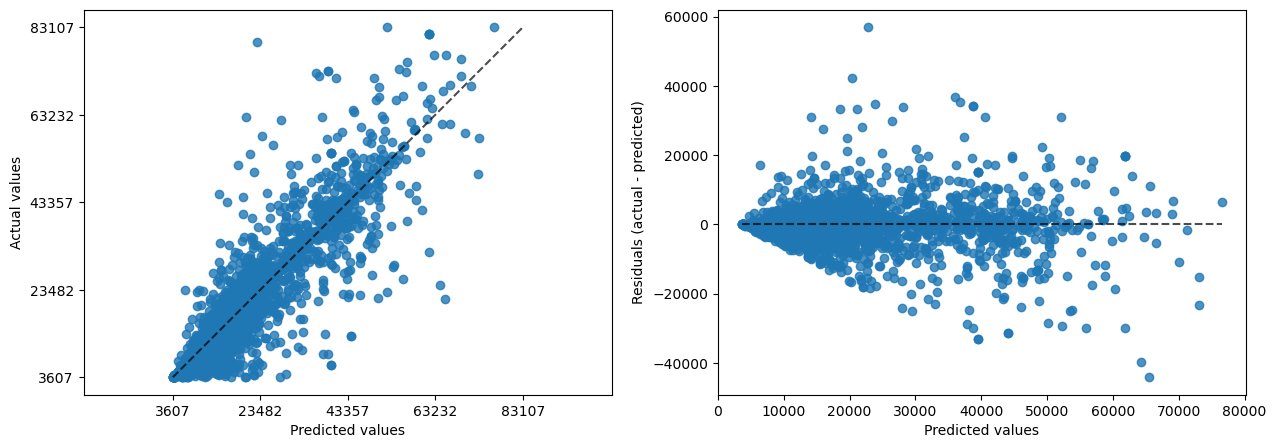

In [11]:
from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
_ = PredictionErrorDisplay.from_predictions(
    y_true, y_pred, kind="actual_vs_predicted", ax=axs[0], subsample =None)

_ = PredictionErrorDisplay.from_predictions(
    y_true, y_pred, kind="residual_vs_predicted", ax=axs[1], subsample =None
)

(2297,) (2297, 1)
(2297,) (2297,)
Отрицательные цены -  0
Max Error: 56,951
MAPE Error: 24.42


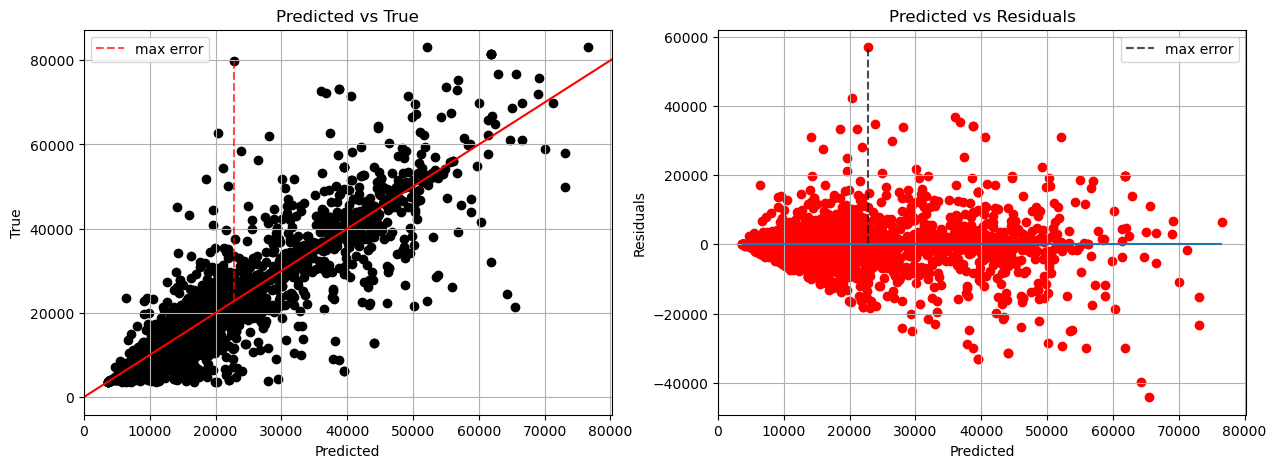

In [12]:
from sklearn.metrics import mean_absolute_percentage_error

y_true = pd.read_csv("test_Y_true.csv")
print(y_pred.shape, y_true.shape)
y_true = y_true.iloc[df_test.index].values.reshape(-1)
print(y_pred.shape, y_true.shape)
print('Отрицательные цены - ', sum(y_pred<0))


def plot_2_error(y_true, y_predicted):
    residuals = y_true - y_predicted
    max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
    max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
    max_true, max_pred = y_true[max_idx], y_predicted[max_idx]
    mape = mean_absolute_percentage_error(y_true, y_predicted)
    print("Max Error:", "{:,.0f}".format(max_error))
    print("MAPE Error:", "{:,.2f}".format(mape*100))

    ## Plot predicted vs true
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    from statsmodels.graphics.api import abline_plot
    ax[0].scatter(y_predicted, y_true, color="black")
    abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
    ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
    ax[0].grid(True)
    ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
    ax[0].legend()

    ## Plot predicted vs residuals
    ax[1].scatter(y_predicted, residuals, color="red")
    ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
    ax[1].grid(True)
    ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
    ax[1].hlines(y=0, xmin=np.min(y_predicted), xmax=np.max(y_predicted))
    ax[1].legend()
    plt.show()

plot_2_error(y_true, y_pred)

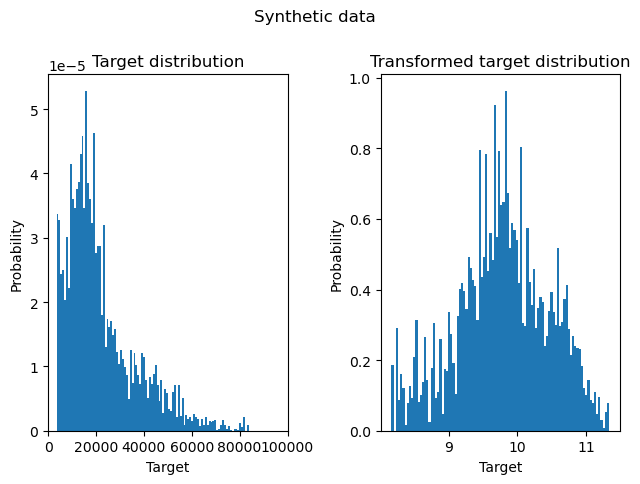

In [13]:
f, (ax0, ax1) = plt.subplots(1, 2)

ax0.hist(y_train, bins=100, density=True)
ax0.set_xlim([0, 100000])
ax0.set_ylabel("Probability")
ax0.set_xlabel("Target")
ax0.set_title("Target distribution")

y_trans = np.log1p(y_train)
ax1.hist(y_trans, bins=100, density=True)
ax1.set_ylabel("Probability")
ax1.set_xlabel("Target")
ax1.set_title("Transformed target distribution")

f.suptitle("Synthetic data", y=1)
plt.tight_layout()

In [14]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import RidgeCV

TransformedTargetRegressor(
    regressor=RidgeCV(), func=np.log1p, inverse_func=np.expm1
)

TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=RidgeCV())

In [15]:
df_train_o = pd.read_csv(path_train)

y_train = df_train_o['Price']
df_train_o = df_train_o.drop('Price',axis = 1)

df_test = pd.read_csv(path_test)
print(df_train_o.shape)
print(df_test.shape)


df_train = df_train_o.drop(['ID','Model'], axis = 1)
df_train['Mileage'] = df_train.Mileage.str.extract('(\d+)').astype(int)
df_train['turbo_engine'] = np.where(df_train['Engine_volume'].str.contains('Turbo'), 1, 0)
df_train['Engine_volume'] = df_train.Engine_volume.str.extract('(\d+)').astype(float)
df_train['Leather_interior'] = df_train['Leather_interior'].replace({'No':0,'Yes':1})



name_one_hot = df_train.select_dtypes(include=['object']).columns.to_list()
name_num = df_train.select_dtypes(exclude=['object']).columns.to_list()

print(name_one_hot)
print(name_num)
print(len(df_train.columns)-len(name_one_hot)-len(name_num))

display(df_train.tail(3))
df_train.info()

X_train = df_train


ct = ColumnTransformer(
        transformers=[
        ("cat", OneHotEncoder(), name_one_hot),
        ("num", "passthrough", name_num),
        ]
    )

#ct.fit_transform(X_train)

pipe = make_pipeline(
    ColumnTransformer(
        transformers=[
        ("cat", OneHotEncoder(), name_one_hot),
        ("num", "passthrough", name_num),
        ]
    ),
    RandomForestRegressor(n_estimators=100)
)

#transformer = QuantileTransformer(output_distribution='normal')
transformer = PowerTransformer(method='box-cox')
regressor = pipe

regr = TransformedTargetRegressor(regressor=regressor, transformer=transformer)

regr.fit(X_train,y_train)


(7236, 16)
(2297, 16)
['Brand', 'Type', 'Fuel_type', 'Gear_box', 'Drive_wheels', 'Doors', 'Color']
['Year_of_production', 'Leather_interior', 'Engine_volume', 'Mileage', 'Cylinders', 'Airbags', 'Tax', 'turbo_engine']
0


,Brand,Year_of_production,Type,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box,Drive_wheels,Doors,Color,Airbags,Tax,turbo_engine
7233,HYUNDAI,2015,Sedan,1,LPG,2.0,283895,4.0,Automatic,Front,04-May,Silver,4,765,0
7234,HYUNDAI,2010,Jeep,1,Diesel,2.0,229398,4.0,Automatic,Front,04-May,Black,4,836,0
7235,TOYOTA,2011,Sedan,1,Hybrid,3.0,368064,6.0,Automatic,4x4,04-May,Grey,12,1172,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7236 entries, 0 to 7235
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               7236 non-null   object 
 1   Year_of_production  7236 non-null   int64  
 2   Type                7236 non-null   object 
 3   Leather_interior    7236 non-null   int64  
 4   Fuel_type           7236 non-null   object 
 5   Engine_volume       7236 non-null   float64
 6   Mileage             7236 non-null   int64  
 7   Cylinders           7236 non-null   float64
 8   Gear_box            7236 non-null   object 
 9   Drive_wheels        7236 non-null   object 
 10  Doors               7236 non-null   object 
 11  Color               7236 non-null   object 
 12  Airbags             7236 non-null   int64  
 13  Tax                 7236 non-null   int64  
 14  turbo_engine        7236 non-null   int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 848.1+

TransformedTargetRegressor(regressor=Pipeline(steps=[('columntransformer',
                                                      ColumnTransformer(transformers=[('cat',
                                                                                       OneHotEncoder(),
                                                                                       ['Brand',
                                                                                        'Type',
                                                                                        'Fuel_type',
                                                                                        'Gear_box',
                                                                                        'Drive_wheels',
                                                                                        'Doors',
                                                                                        'Color']),
                                                                                      ('num',
                                                                                       'passthrough',
                                                                                       ['Year_of_production',
                                                                                        'Leather_interior',
                                                                                        'Engine_volume',
                                                                                        'Mileage',
                                                                                        'Cylinders',
                                                                                        'Airbags',
                                                                                        'Tax',
                                                                                        'turbo_engine'])])),
                                                     ('randomforestregressor',
                                                      RandomForestRegressor())]),
                           transformer=PowerTransformer(method='box-cox'))

In [16]:
df_test = pd.read_csv(path_test)
df_test = df_test.drop(['ID','Model'], axis = 1)
df_test['Mileage'] = df_test.Mileage.str.extract('(\d+)').astype(int)
df_test['turbo_engine'] = np.where(df_test['Engine_volume'].str.contains('Turbo'), 1, 0)
df_test['Engine_volume'] = df_test.Engine_volume.str.extract('(\d+)').astype(float)
df_test['Leather_interior'] = df_test['Leather_interior'].replace({'No':0,
                          'Yes':1
                         })
X_test = df_test
y_true = pd.read_csv("test_Y_true.csv").values.reshape(-1)

y_pred = regr.predict(X_test)
print(mean_absolute_percentage_error(y_true, y_pred))

0.2128131823844564


Max Error: 57,979
MAPE Error: 21.28


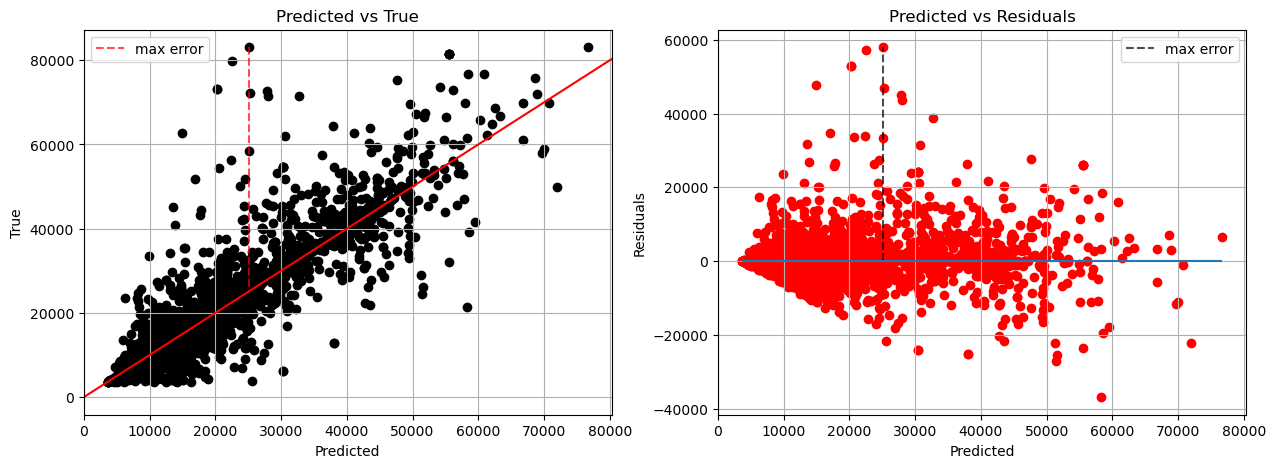

In [17]:
plot_2_error(y_true, y_pred)

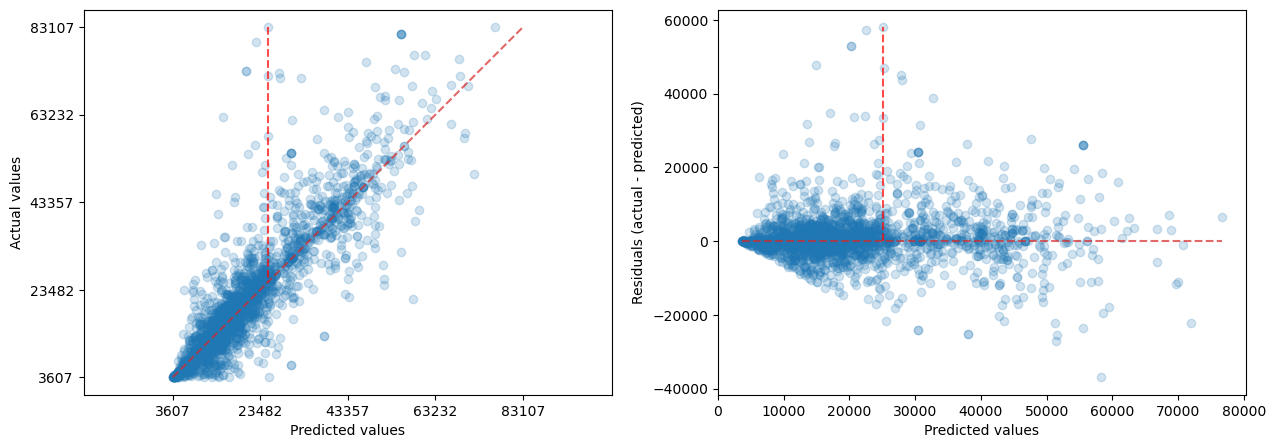

In [22]:
from sklearn.metrics import PredictionErrorDisplay


def plot_2_error(y_true = y_true , y_pred = y_pred):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    _ = PredictionErrorDisplay.from_predictions(
        y_true = y_true, y_pred = y_pred, kind="actual_vs_predicted", ax=axs[0], 
        subsample =None,
        scatter_kwargs={"alpha": 0.2, "color": "tab:blue"},
        line_kwargs={"color": "tab:red"})

    _ = PredictionErrorDisplay.from_predictions(
        y_true = y_true, y_pred = y_pred, kind="residual_vs_predicted", ax=axs[1],
        subsample =None,
        scatter_kwargs={"alpha": 0.2, "color": "tab:blue"},
        line_kwargs={"color": "tab:red"}
    )

    residuals =  y_true - y_pred
    max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
    max_idx = list(residuals).index(max_error)

    max_true, max_pred = y_true[max_idx], y_pred[max_idx]

    axs[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
    axs[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='red', linestyle='--', alpha=0.7, label="max error");

    
plot_2_error(y_true,y_pred)

In [23]:
pip list

Package                       Version
----------------------------- --------------------
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.3.0
appnope                       0.1.2
appscript                     1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astor                         0.8.1
astroid                       2.6.6
astropy                       5.1
asttokens                     2.0.5
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backpo

queuelib                      1.5.0
regex                         2022.7.9
requests                      2.28.1
requests-file                 1.5.1
rope                          0.22.0
rsa                           4.7.2
Rtree                         0.9.7
ruamel-yaml-conda             0.15.100
s3transfer                    0.6.0
scikit-image                  0.19.2
scikit-learn                  1.2.0
scikit-learn-intelex          2021.20220215.132722
scipy                         1.7.3
Scrapy                        2.6.2
seaborn                       0.11.2
Send2Trash                    1.8.0
service-identity              18.1.0
setuptools                    63.4.1
setuptools-scm                6.4.2
shap                          0.41.0
sip                           4.19.13
six                           1.16.0
sklearn                       0.0.post1
slicer                        0.0.7
smart-open                    5.2.1
sniffio                       1.2.0
snowballstemmer              

In [24]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.
